In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report#분류평가

1.데이터 수집

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df1=df.iloc[:,:8]

2.데이터 전처리
1. 결측치 처리
2. 이상치 처리

In [ ]:
#연속
df1.age.fillna(df1.age.mean(),inplace=True)
df1.age=df1.age.astype('int32')

In [ ]:
#범주
df1.dropna(inplace=True)

In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
X=df1.drop(['survived'],axis=1)
y=df1['survived'].values

3. 범주형처리

In [ ]:
def n_c_df_분류(df):
  n_l=[]
  c_l=[]
  for column in df.columns.to_list():
    if df[column].nunique()<11:
      c_l.append(column)
      continue
    n_l.append(column)
  n_df=df.drop(c_l,axis=1)
  n_df=n_df.astype(dict.fromkeys(n_df.columns,'float64'))
  c_df=df.drop(n_l,axis=1)
  c_df=c_df.astype(dict.fromkeys(c_df.columns,'category'))
  return (n_df,c_df)

In [ ]:
n_df,c_df=n_c_df_분류(X)

In [ ]:
c_df

,pclass,sex,sibsp,parch,embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
...,...,...,...,...,...
884,2,male,0,0,S
885,1,female,0,0,S
886,3,female,1,2,S
887,1,male,0,0,C


In [ ]:
def 범주처리기(c_df):
  c_o_h_e=OneHotEncoder()
  c_o_h_e.fit(c_df)
  tr_data=c_o_h_e.transform(c_df)
  out_data=tr_data.toarray()
  c_df=pd.DataFrame(out_data,columns=c_o_h_e.get_feature_names_out())
  return c_df

In [ ]:
s_c_df=범주처리기(c_df)
s_c_df

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


4. 범위처리

In [ ]:
n_df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
884,27.0,13.0000
885,19.0,30.0000
886,29.0,23.4500
887,26.0,30.0000


In [ ]:
def 범위처리기(n_df):
  from sklearn.preprocessing import StandardScaler
  s_e=StandardScaler()
  name=n_df.columns.to_list()
  s_e.fit(n_df)
  s_data=s_e.transform(n_df)
  n_df=pd.DataFrame(s_data,columns=name)
  return n_df

In [ ]:
s_n_df=범위처리기(n_df)
s_n_df

,age,fare
0,-0.578023,-0.500240
1,0.655371,0.788947
2,-0.269675,-0.486650
3,0.424109,0.422861
4,0.424109,-0.484133
...,...,...
884,-0.192588,-0.384475
885,-0.809285,-0.042213
886,-0.038413,-0.174084
887,-0.269675,-0.042213


5. 전처리된 데이터 데이터 프레임 화

In [ ]:
def 병합(n_df,c_df):
    out_df=pd.concat([n_df,c_df],axis=1)
    return out_df

In [ ]:
out_df=병합(s_n_df,s_c_df)
out_df

,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,-0.578023,-0.500240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.655371,0.788947,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.269675,-0.486650,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.424109,0.422861,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.424109,-0.484133,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.192588,-0.384475,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,-0.809285,-0.042213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,-0.038413,-0.174084,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-0.269675,-0.042213,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
s_X=out_df
s_y=y

In [ ]:
tr_x,tt_x,tr_y,tt_y=train_test_split(s_X,s_y,random_state=1)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((666, 24), (223, 24), (666,), (223,))

3.학습

In [ ]:
m=LogisticRegression()
m.fit(tr_x,tr_y)
m.score(tr_x,tr_y),m.score(tt_x,tt_y)

(0.8078078078078078, 0.8565022421524664)

4.테스트 및 검증

In [ ]:
ty=tt_y
py=m.predict(tt_x)
print(classification_report(ty,py))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       138
           1       0.82      0.80      0.81        85

    accuracy                           0.86       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.86      0.86      0.86       223



#전처리기 통합 클래스화

In [ ]:
class data_preprocessor:
  import pandas as pd
  from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
  def __init__(self,df,y_name,category_judgment_condition=11,c_encoder='OneHotEncoder()',n_encoder='StandardScaler()'):
    all_df=df.copy()
    self.y_name=y_name
    X=all_df.drop([self.y_name],axis=1)
    self.y=all_df[self.y_name]
    self.origin_df=X
    self.h_na_df=None
    self.h_out_df=None
    self.n_df=None
    self.c_df=None
    self.c_l=[]
    self.n_l=[]
    self.category_judgment_condition=category_judgment_condition
    for column in df:
      if df[column].nunique()<category_judgment_condition:
        self.c_l.append(column)
        continue
      self.n_l.append(column)
    self.c_encoder=eval("self."+c_encoder)
    self.n_encoder=eval("self."+n_encoder)
    self.out_df=None
    self.out_X=None
    self.out_y=None

  def missing_value_processing(self):
    ck=True
    df=self.origin_df.copy()
    d_l=[]
    for i in df.columns.to_list():
      if (df[i].isnull().sum()/len(df))>=0.5:
        d_l.append(i)
        continue
      if df[i].isnull().sum()>0:
        if i in self.n_l and df[i].isnull().sum()/len(df)<0.2:
          df[i].fillna(df[i].mean(),inplace=True)
      if df[i].isnull().sum()/len(df)>0.2:
        ck=False
    if d_l:
      df.drop(d_l,axis=1,inplace=True)
    if ck:
      df.dropna(inplace=True)
    else:
      print("특이 사항으로 추가 결측치 정리가 필요합니다.")
      return df
    self.c_l=[]
    self.n_l=[]
    for column in df:
      if df[column].nunique()<self.category_judgment_condition:
        self.c_l.append(column)
        continue
      self.n_l.append(column)
    ck_df=pd.merge(df,self.y,right_index=True,left_index=True)
    ck_df.reset_index(drop=True,inplace=True)
    self.y=ck_df[self.y_name]
    df=ck_df.drop([self.y_name],axis=1)
    X=df.copy()
    X=X.astype(dict.fromkeys(self.n_l,'float64'))
    X=X.astype(dict.fromkeys(self.c_l,'category'))
    self.h_na_df=X
    return X

  def outlier_value_processing(self,df):
    print("이상치 처리는 연속성 데이터만 진행 됩니다.")
    X=df.copy()
    Q1 = X.quantile(q=0.25,numeric_only=True)
    Q3 = X.quantile(q=0.75,numeric_only=True)
    IQR=Q3-Q1
    for i in Q1.index.to_list():
      X = X[(X[i] <= Q3[i]+1.5*IQR[i]) & (X[i] >= Q1[i]-1.5*IQR[i])]
    X=pd.merge(X,self.y,right_index=True,left_index=True)
    X.reset_index(drop=True,inplace=True)
    self.y=X[self.y_name]
    X=X.drop([self.y_name],axis=1)
    self.h_out_df=X
    return X

  def n_c_df_classification(self,df):
    self.c_l=[]
    self.n_l=[]
    for column in df:
      if df[column].nunique()<self.category_judgment_condition:
        self.c_l.append(column)
        continue
      self.n_l.append(column)
    n_df=df.drop(self.c_l,axis=1)
    self.n_df=n_df.astype(dict.fromkeys(n_df.columns,'float64'))
    c_df=df.drop(self.n_l,axis=1)
    self.c_df=c_df.astype(dict.fromkeys(c_df.columns,'category'))
    #return self.merge_df(self.n_df,self.c_df)
    return (self.n_df,self.c_df)

  def categorical_handler(self,c_df):
    self.c_encoder.fit(c_df)
    tr_data=self.c_encoder.transform(c_df)
    out_data=tr_data.toarray()
    self.c_df=self.pd.DataFrame(out_data,columns=self.c_encoder.get_feature_names_out())
    return self.c_df

  def continuous_handler(self,n_df):
    name=n_df.columns.to_list()
    self.n_encoder.fit(n_df)
    s_data=self.n_encoder.transform(n_df)
    self.n_df=self.pd.DataFrame(s_data,columns=name)
    return self.n_df

  def merge_df(self,n_df,c_df):
    self.out_df=self.pd.concat([self.categorical_handler(c_df),self.continuous_handler(n_df)],axis=1)
    return self.out_df

  def add_categorical_handler(self,df):
    tr_data=self.c_encoder.transform(df)
    out_data=tr_data.toarray()
    out_df=self.pd.DataFrame(out_data,columns=self.c_encoder.get_feature_names_out())
    return out_df

  def add_continuous_handler(self,df):
    name=df.columns.to_list()
    tr_data=self.n_encoder.transform(df)
    out_df=self.pd.DataFrame(tr_data,columns=name)
    return out_df

  def run(self,이상치처리="X"):
    df=self.missing_value_processing()
    if df.isnull().sum().sum()>0:
      return df
    if 이상치처리=='O':
      df=self.outlier_value_processing(df)
    else:
      print("이상치 처리 없이 진행됩니다.")
    n_df,c_df=self.n_c_df_classification(df)
    s_X=self.merge_df(n_df,c_df)
    self.out_X=s_X
    self.out_y=self.y
    return self.out_X,self.out_y

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df1 = df.iloc[:,:8]
전처리기 = data_preprocessor(df1, 'survived')
out_x, out_y = 전처리기.run()

이상치 처리 없이 진행됩니다.


In [ ]:
tr_x, tt_x, tr_y, tt_y = train_test_split(out_x, out_y, random_state = 1)
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((666, 24), (223, 24), (666,), (223,))

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df2=df.iloc[:,:8]

전처리기 = data_preprocessor(df2,'survived')
out1_x,out1_y = 전처리기.run('O')

tr1_x,tt1_x,tr1_y,tt1_y=train_test_split(out1_x,out1_y,random_state=1)
tr1_x.shape,tt1_x.shape,tr1_y.shape,tt1_y.shape



이상치 처리는 연속성 데이터만 진행 됩니다.


((540, 23), (181, 23), (540,), (181,))

In [ ]:
df[df.sibsp == 8]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
159,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
201,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
324,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
792,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
846,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [ ]:
전처리기.n_l

['age', 'fare']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

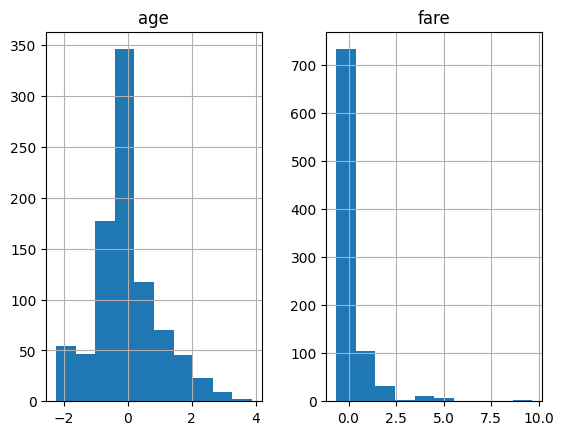

In [ ]:
out_x[전처리기.n_l].hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

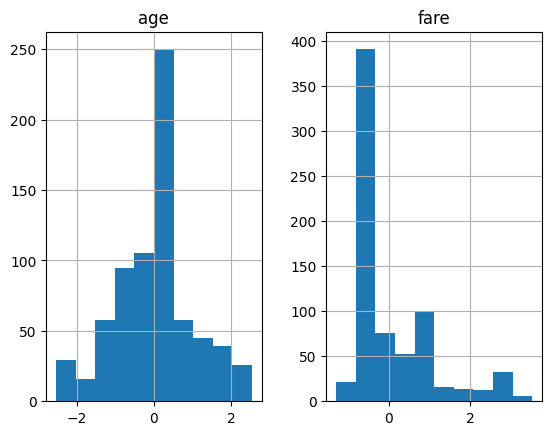

In [ ]:
out1_x[전처리기.n_l].hist()

In [ ]:
m1=LogisticRegression()
m1.fit(tr_x,tr_y)

m2=LogisticRegression()
m2.fit(tr1_x,tr1_y)

LogisticRegression()

In [ ]:
m1.score(tr_x,tr_y),m1.score(tt_x,tt_y)

(0.8063063063063063, 0.8565022421524664)

In [ ]:
m2.score(tr1_x,tr1_y),m2.score(tt1_x,tt1_y)

(0.8166666666666667, 0.7513812154696132)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
m1 = LogisticRegression()
cross_val_score(m1, tr_x, tr_y).mean()

0.7972730333295927

iris 데이터

In [ ]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X = df.drop(['species'], axis = 1)
y = df.species

In [ ]:
s = StandardScaler()
s_X = s.fit_transform(X)
s_y = y.values

In [ ]:
s_X.shape, s_y.shape

((150, 4), (150,))

In [ ]:
m = LogisticRegression()
m.fit(s_X, s_y)

LogisticRegression()

In [ ]:
m.coef_

array([[-1.07404149,  1.16006342, -1.93062866, -1.81168873],
       [ 0.58780051, -0.36182377, -0.36346274, -0.82619289],
       [ 0.48624098, -0.79823965,  2.2940914 ,  2.63788161]])

In [ ]:
m.decision_function(s_X)

In [ ]:
m.predict(s_X[:1])

array(['setosa'], dtype=object)

Q1 data4을 분석하여 결과를 도출하시오

In [ ]:
df = pd.read_csv('data4.csv')
df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
df.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [ ]:
np.unique(df['class'])

array([0., 1.])

In [ ]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(X)
ss_df = s.transform(X)
s_df = pd.DataFrame(ss_df, columns = X.columns)
s_df

,alcohol,sugar,pH
0,0.202899,0.019939,0.612403
1,0.260870,0.030675,0.372093
2,0.260870,0.026074,0.418605
3,0.260870,0.019939,0.341085
4,0.202899,0.019939,0.612403
...,...,...,...
6492,0.463768,0.015337,0.426357
6493,0.231884,0.113497,0.333333
6494,0.202899,0.009202,0.209302
6495,0.695652,0.007669,0.480620


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 1, test_size = 0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4547, 3), (1950, 3), (4547,), (1950,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier()
m.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_cm = KNeighborsClassifier().fit(train_x, train_y)

In [ ]:
m.score(train_x, train_y), m.score(test_x, test_y)

(0.9973608972949197, 0.8564102564102564)

In [ ]:
knn_cm.score(train_x, train_y), knn_cm.score(test_x, test_y)

(0.8994941719815263, 0.8553846153846154)

In [ ]:
log = LogisticRegression()
log.fit(train_x, train_y)

LogisticRegression()

In [ ]:
cross_val_score(log, test_x, test_y).mean()

0.7769230769230768

In [ ]:
s = StandardScaler()
s_X = s.fit_transform(X)
s_y = y.values
tr_x,tt_x,tr_y,tt_y=train_test_split(X,s_y,random_state=1)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape
# s_y
# s_X.shape , s_y.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [ ]:
tr1_x,tt1_x,tr1_y,tt1_y=train_test_split(X,s_y,random_state=1)
trs = StandardScaler()
trs.fit(tr1_x)
s_tr = s.fit_transform(tr1_x)
s_tt = s.fit_transform(tt1_x)
s_tr.shape,s_tt.shape,tr1_y.shape,tt1_y.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [ ]:
m1= LogisticRegression()
m1.fit(tr_x,tr_y)
m1.coef_,m1.intercept_
m1.score(tr_x,tr_y),m1.score(tt_x,tt_y)
cross_val_score(m1,tr_x,tr_y).mean()

0.7773004791238878

In [ ]:
m2= LogisticRegression()
m2.fit(s_tr,tr1_y)
m2.coef_,m2.intercept_
m2.score(s_tr,tr1_y),m2.score(s_tt,tt1_y)
cross_val_score(m2,s_tr,tr_y).mean()

0.7791476859895751

In [ ]:
from sklearn.model_selection import cross_validate,BaseCrossValidator,KFold
cs_d = cross_validate(m1,tr_x,tr_y)
cs_d



{'fit_time': array([0.10244083, 0.12446976, 0.16491008, 0.06651044, 0.16430974]),
 'score_time': array([0.00788045, 0.0034225 , 0.00985146, 0.00385904, 0.00297642]),
 'test_score': array([0.77333333, 0.77333333, 0.775154  , 0.78131417, 0.78336756])}

In [ ]:
cs_d['test_score'].mean()

0.7773004791238878

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
m1 = KNeighborsClassifier(n_neighbors=2)
m2 = LogisticRegression(C=3,random_state=1)
m3 = SGDClassifier(max_iter=10000,tol=0,random_state=1)
m4 = DecisionTreeClassifier(max_depth=2,random_state=1)
s_tr.shape,s_tt.shape,tr1_y.shape,tt1_y.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [ ]:
for m in [m1,m2,m3,m4]:
    print(cross_val_score(m,s_tr,tr1_y).mean())

0.8175277207392198
0.7797630706049595
0.7818173011109357
0.8156800926657191


In [ ]:
from sklearn.model_selection import GridSearchCV
m1 = KNeighborsClassifier()
m2 = LogisticRegression(random_state = 10)
p = {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9]}
p2 = {'tol' : [0, 0.000001, 0.0001, 0.01, 0.1],
      'C' : [0,1,2,3,4,5,6,7,8,9,10],
      'max_iter' : [1,10,100,1000,10000]}
gs = GridSearchCV(m2, p2)
gs.fit(tr_x, tr_y)

In [ ]:
# 최고의 모델
m = gs.best_estimator_
m.score(tr_x, tr_y), m.score(tt_x, tt_y)

(0.7799671592775042, 0.7864615384615384)

In [ ]:
gs.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 10,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=10),
 'n_jobs': None,
 'param_grid': {'tol': [0, 1e-06, 0.0001, 0.01, 0.1],
  'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'max_iter': [1, 10, 100, 1000, 10000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
gs.best_index_

260

In [ ]:
gs.best_score_

0.8594048333596588

In [ ]:
from sklearn.datasets import load_iris
d = load_iris()
df = pd.DataFrame(d['data'], columns = d['feature_names'])
df['y'] = d['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
print(d['DESCR'])

In [ ]:
sns.load_dataset('mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Q2 'mpg'데이터를 이용하여 입력시 연비를 계산해주는 예측기를 설계하시오.

In [ ]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1. cylinders: 엔진 실린더의 개수
2. displacement: 배기량
3. horsepower: 마력
4. weight: 무게
5. acceleration: 가속력
6. model_year: 모델 연도
7. origin: 제조 국가
8. car_name: 자동차 모델 이름

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df.dropna(subset = ['horsepower'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
sc_df = df.drop(columns = ['origin', 'mpg', 'name'])
ca_df = df[['origin']]
y = df['mpg']

In [ ]:
# df = pd.get_dummies(df, columns=['origin'], prefix='origin')
# df.info()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(ca_df)

OneHotEncoder()

In [ ]:
ohe.feature_names_in_

array(['origin'], dtype=object)

In [ ]:
ohe.categories_

[array(['europe', 'japan', 'usa'], dtype=object)]

In [ ]:
ohe_ca_df = ohe.transform(ca_df)
ohe_ca_df.toarray().shape

(392, 3)

In [ ]:
ohe_df = pd.DataFrame(ohe_ca_df.toarray(), columns = ohe.get_feature_names_out())
ohe_df

,origin_europe,origin_japan,origin_usa
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
387,0.0,0.0,1.0
388,1.0,0.0,0.0
389,0.0,0.0,1.0
390,0.0,0.0,1.0


In [ ]:
# X = df.drop(columns=['mpg', 'name'])
# y = df['mpg']
# X.shape, y.shape

((392, 9), (392,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(sc_df)
ss_df = s.transform(sc_df)
s_df = pd.DataFrame(ss_df, columns = sc_df.columns)
s_df

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,1.0
388,0.2,0.074935,0.032609,0.146583,0.988095,1.0
389,0.2,0.173127,0.206522,0.193365,0.214286,1.0
390,0.2,0.134367,0.179348,0.286929,0.630952,1.0


In [ ]:
end_df = pd.concat([ohe_df, s_df], axis = 1)
end_df

,origin_europe,origin_japan,origin_usa,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.0,0.0,1.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.0,0.0,1.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.0,0.0,1.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.0,0.0,1.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.0,0.0,1.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...,...,...,...
387,0.0,0.0,1.0,0.2,0.186047,0.217391,0.333711,0.452381,1.0
388,1.0,0.0,0.0,0.2,0.074935,0.032609,0.146583,0.988095,1.0
389,0.0,0.0,1.0,0.2,0.173127,0.206522,0.193365,0.214286,1.0
390,0.0,0.0,1.0,0.2,0.134367,0.179348,0.286929,0.630952,1.0


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(end_df, y, random_state = 1, test_size = 0.2)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((313, 9), (79, 9), (313,), (79,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [ ]:
y_pre = model.predict(test_X)

In [ ]:
model.score(train_X, train_y), model.score(test_X, test_y)

(0.8209997385513097, 0.8280475922429124)

In [ ]:
# MSE : 예측값과 실제 값의 차이를 제곱한 값들의 평균
# MSE 값이 작을수록 모델이 더 좋은 예측을 수행한다.

# R2 : 회귀 모델이 주어진 데이터를 얼마나 잘 설명하는지를 나타내는 지표
# 0~1 사이 값인데 1에 가까울수록 모델이 데이터를 완벽하게 설명한다고 볼 수 있음
# 음수가 나오면 예측을 못한거임

# 따라서 test_X로 예측한 결과 y_pre와 실제 값인 test_y의 값을 이용해서 MSE와 R2를 계산하고 출력한것

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pre)
r2 = r2_score(test_y, y_pre)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 11.92
R-squared (R2): 0.83


In [ ]:
train_X

,origin_europe,origin_japan,origin_usa,cylinders,displacement,horsepower,weight,acceleration,model_year
334,0.0,0.0,1.0,0.2,0.173127,0.206522,0.248653,0.458333,0.916667
258,0.0,0.0,1.0,0.6,0.405685,0.347826,0.569039,0.636905,0.666667
139,1.0,0.0,0.0,0.2,0.077519,0.201087,0.171817,0.505952,0.333333
310,0.0,1.0,0.0,0.2,0.046512,0.103261,0.115112,0.500000,0.833333
349,1.0,0.0,0.0,0.2,0.095607,0.152174,0.163595,0.369048,0.916667
...,...,...,...,...,...,...,...,...,...
203,0.0,1.0,0.0,0.2,0.074935,0.157609,0.153672,0.500000,0.500000
255,0.0,0.0,1.0,0.6,0.423773,0.239130,0.452793,0.547619,0.666667
72,0.0,0.0,1.0,1.0,0.617571,0.456522,0.704565,0.357143,0.166667
235,0.0,0.0,1.0,0.2,0.077519,0.092391,0.124185,0.535714,0.583333


In [ ]:
new_data = pd.DataFrame({
    'cylinders': [4],
    'displacement': [120],
    'horsepower': [80],
    'weight': [2800],
    'acceleration': [15],
    'model_year': [78]
})
new_data2 = pd.DataFrame({
    'origin_europe': [1],
    'origin_japan': [0],
    'origin_usa': [0]
})
new_data

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,4,120,80,2800,15,78


In [ ]:
s_new_data = s.transform(new_data)
s_new_data_df = pd.DataFrame(s_new_data, columns = new_data.columns)
s_new_data_df

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.2,0.134367,0.184783,0.336547,0.416667,0.666667


In [ ]:
new_test_data = pd.concat([new_data2, s_new_data_df], axis = 1)
new_test_data

,origin_europe,origin_japan,origin_usa,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1,0,0,0.2,0.134367,0.184783,0.336547,0.416667,0.666667


In [ ]:
model.predict(new_test_data)

array([26.453125])

iris 꽃종류 분류기

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']
X.shape, y.shape

((150, 4), (150,))

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1, test_size = 0.2)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
model = RandomForestClassifier(random_state = 1)
model.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
model.score(train_X, train_y), model.score(test_X, test_y)

(1.0, 0.9666666666666667)

In [ ]:
new_data = pd.DataFrame({
    'sepal_length': [5.1],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2]
})

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
predictions = model.predict(new_data)
print("새로운 데이터의 품종 예측:", predictions[0])

새로운 데이터의 품종 예측: setosa


mpg - 강사님 코드

In [ ]:
df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
X = df_mpg.drop(['mpg'], axis = 1)
y = df_mpg['mpg']#.values

In [ ]:
#X.dropna(inplace = True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   name          398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [ ]:
X = X.iloc[:, :7]
c_l = []
for i in X.columns:
    if X[i].nunique() < 20:
        c_l.append(i)
X = X.astype(dict.fromkeys(c_l, 'category'))
X = X.astype(dict.fromkeys([i for i in X.columns if i not in c_l], 'float64'))
X.dropna(inplace = True)
d = pd.merge(X, y, right_index = True, left_index = True)
X = d.drop(['mpg'], axis = 1)
y = d['mpg'].values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     392 non-null    category
 1   displacement  392 non-null    float64 
 2   horsepower    392 non-null    float64 
 3   weight        392 non-null    float64 
 4   acceleration  392 non-null    float64 
 5   model_year    392 non-null    category
 6   origin        392 non-null    category
dtypes: category(3), float64(4)
memory usage: 17.4 KB


In [ ]:
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
pr_m = make_column_transformer((StandardScaler(), make_column_selector(dtype_include = 'float64')), (OneHotEncoder(), make_column_selector(dtype_include = 'category')))
pr_m.fit(X)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bc111b7d660>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bc111b7fdc0>)])

In [ ]:
s_X = pr_m.transform(X)

In [ ]:
pr_m.get_feature_names_out()

array(['standardscaler__displacement', 'standardscaler__horsepower',
       'standardscaler__weight', 'standardscaler__acceleration',
       'onehotencoder__cylinders_3', 'onehotencoder__cylinders_4',
       'onehotencoder__cylinders_5', 'onehotencoder__cylinders_6',
       'onehotencoder__cylinders_8', 'onehotencoder__model_year_70',
       'onehotencoder__model_year_71', 'onehotencoder__model_year_72',
       'onehotencoder__model_year_73', 'onehotencoder__model_year_74',
       'onehotencoder__model_year_75', 'onehotencoder__model_year_76',
       'onehotencoder__model_year_77', 'onehotencoder__model_year_78',
       'onehotencoder__model_year_79', 'onehotencoder__model_year_80',
       'onehotencoder__model_year_81', 'onehotencoder__model_year_82',
       'onehotencoder__origin_europe', 'onehotencoder__origin_japan',
       'onehotencoder__origin_usa'], dtype=object)